# Machine Learning
## Assignment 1
### Morgan Reilly -- 20235398

## References:
* https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#tutorial-setup

## Imports

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import csv

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree

## Text Processing

* Create csv file from text file
* Read in text file and transpose to csv
* Do this for both test and train data

#### Training Data

In [2]:
# Read in and store training data as datafram
training_data = pd.read_csv("data/beer_training.txt",
                            sep="\t", header=None)
training_data.columns = ['calorific_value', 'nitrogen', 'turbidity',
                        'style', 'alcohol', 'sugars', 'bitterness',
                        'beer_id', 'colour', 'degree_of_fermentation']
# Convert to csv file and save
training_data.to_csv("data/beer_training.csv", index=None)
training_data = pd.read_csv("data/beer_training.csv")

In [3]:
training_data.head()

,calorific_value,nitrogen,turbidity,style,alcohol,sugars,bitterness,beer_id,colour,degree_of_fermentation
0,45.305310,0.459548,1.917273,ale,4.227692,16.67,12.568947,167,11.04,62.178571
1,43.889381,0.548977,3.186364,ale,4.289231,16.73,14.974000,128,13.44,63.032857
2,41.588496,0.542847,1.568182,ale,4.344615,16.48,11.848789,88,14.04,63.468571
3,44.553097,0.480301,1.871818,ale,4.424615,18.59,13.879632,147,12.48,63.531429
4,41.013274,0.441860,2.345455,ale,4.264615,16.35,12.186053,74,12.12,63.747143


#### Test Data

In [4]:
# Read in and store training data as datafram
test_data = pd.read_csv("data/beer_test.txt",
                            sep="\t", header=None)
test_data.columns = ['calorific_value', 'nitrogen', 'turbidity',
                        'style', 'alcohol', 'sugars', 'bitterness',
                        'beer_id', 'colour', 'degree_of_fermentation']
# Convert to csv file and save
test_data.to_csv("data/beer_test.csv", index=None)
test_data = pd.read_csv("data/beer_test.csv")

In [5]:
test_data.head()

,calorific_value,nitrogen,turbidity,style,alcohol,sugars,bitterness,beer_id,colour,degree_of_fermentation
0,41.721239,0.503276,2.628182,ale,4.015385,16.73,10.452789,93,13.44,55.337143
1,42.429204,0.525512,1.776364,ale,4.092308,16.72,10.999526,103,12.24,58.380000
2,45.880531,0.443233,2.628182,ale,4.276923,16.68,13.456368,178,10.92,58.382857
3,45.305310,0.471668,1.806364,ale,4.126154,18.84,9.202737,166,10.92,58.525714
4,38.977876,0.392846,2.272727,ale,4.015385,16.77,9.457895,44,10.56,58.900000


In [6]:
training_data.count()

calorific_value           124
nitrogen                  124
turbidity                 124
style                     124
alcohol                   124
sugars                    124
bitterness                124
beer_id                   124
colour                    124
degree_of_fermentation    124
dtype: int64

## Classification
Adapted from: https://scikit-learn.org/stable/modules/tree.html#classification
* 2 input arrays: 
    * X -> 2D array

In [7]:
training_data.describe()

,calorific_value,nitrogen,turbidity,alcohol,sugars,bitterness,beer_id,colour,degree_of_fermentation
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,41.638096,0.322277,1.858922,3.998486,17.365645,8.935387,90.032258,11.321226,67.143733
std,2.623812,0.135035,0.891977,0.250500,1.113639,3.419934,50.833370,2.842828,5.862946
min,37.075221,0.107013,0.290909,3.393846,15.740000,2.730211,1.000000,5.760000,53.668571
25%,38.966814,0.215891,1.192727,3.801538,16.560000,6.140829,44.500000,9.000000,63.336071
50%,41.809735,0.290150,1.720000,4.015385,16.900000,9.436842,94.500000,11.520000,66.663571
75%,44.022124,0.405223,2.373409,4.219231,18.150000,11.476408,133.500000,13.230000,70.733929
max,45.836283,0.742774,4.255455,4.427692,20.650000,20.063789,177.000000,20.520000,87.238571


## Classification

#### Sample Set
* `n_samples`

In [12]:
n_samples = []
for col,row in training_data.iterrows():
    rows = [row[0], row[1], row[2], row[4], row[5], 
            row[6], row[7], row[8], row[9]]
    n_samples.append(rows) 
print(len(n_samples))

124


#### Feature Set
* `n_features`

In [13]:
n_features = []
for col in training_data['style']:
    n_features.append(col)
    
print(len(n_features))

124


##### Set X, y

In [16]:
X = n_samples
y = n_features

##### Set Y

[Text(181.35000000000002, 199.32, 'X[1] <= 0.36\ngini = 0.665\nsamples = 124\nvalue = [42, 44, 38]'),
 Text(111.60000000000001, 163.07999999999998, 'X[7] <= 9.42\ngini = 0.552\nsamples = 84\nvalue = [5, 42, 37]'),
 Text(55.800000000000004, 126.83999999999999, 'X[5] <= 9.667\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(27.900000000000002, 90.6, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]'),
 Text(83.7, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(167.4, 126.83999999999999, 'X[3] <= 3.934\ngini = 0.34\nsamples = 50\nvalue = [5, 40, 5]'),
 Text(139.5, 90.6, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(195.3, 90.6, 'X[5] <= 8.714\ngini = 0.651\nsamples = 13\nvalue = [5, 3, 5]'),
 Text(139.5, 54.359999999999985, 'X[2] <= 1.615\ngini = 0.408\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(111.60000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(167.4, 18.119999999999976, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(25

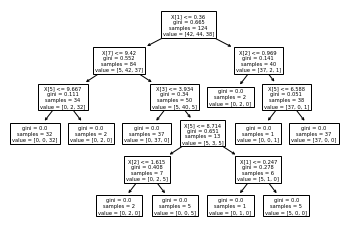

In [18]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)